# SUN-RGBD

In [12]:
import glob
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from IPython.display import Image, display
import cv2
import numpy as np
import collections

In [14]:
dataset_dir = '/datatmp/Datasets/SunRGBD/SUNRGBD/xtion/sun3ddata'
rgb_images  = '*/*/*/image/*.jpg'
depth_images = '*/*/*/depth/*.png'

rgb_glob    = glob.glob( os.path.join(dataset_dir, rgb_images))
depth_glob  = glob.glob( os.path.join(dataset_dir, depth_images))

print('RGB images: ', (len(rgb_glob) ))
print('Depth images: ', (len(depth_glob) ))

RGB images:  3090
Depth images:  3090


(441, 591, 3)
(441, 591, 3)


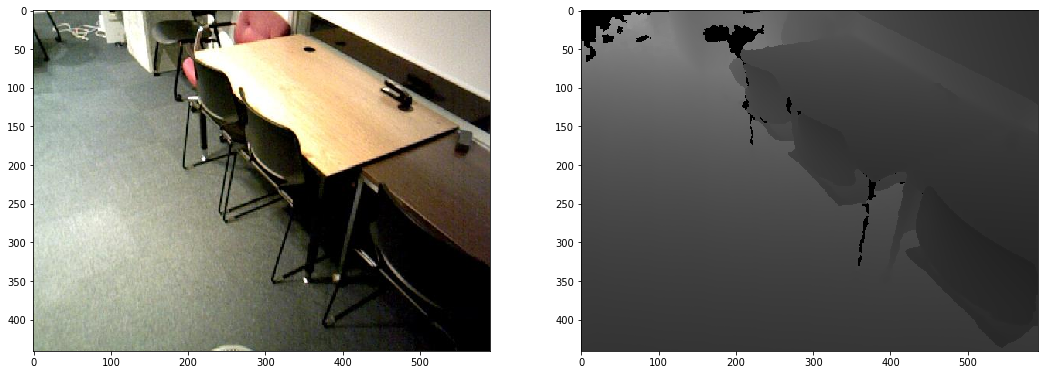

In [15]:
idx = 3
rgb_im   = cv2.imread(rgb_glob[idx])
depth_im = cv2.imread(depth_glob[idx])
print(rgb_im.shape)
print(depth_im.shape)

plt.figure(figsize=(18, 18))
plt.subplot(221)
plt.imshow( rgb_im[:,:,::-1] )
plt.subplot(222)
plt.imshow( depth_im[:,:,::-1])

# SYNTHIA


In [17]:

dataset_dir = '/datatmp/Datasets/synthia-sf/SYNTHIA-SF/'
rgb_images  = 'SEQ[12345]/RGBLeft/*.png'
depth_images = 'SEQ[12345]/DepthLeft/*.png'

"""
dataset_dir = '/datatmp/Datasets/detection/synthia/train/'
rgb_images  = '*/*/RGB/*.png'
depth_images = '*/*/Depth/*.png'
"""
#/test5_30segs_weather_4_spawn_1_roadTexture_1_P_None_C_None_B_None_WC_None
#/19-10-2018_14-44-11
#/RGB

rgb_glob    = glob.glob( os.path.join(dataset_dir, rgb_images))
depth_glob  = glob.glob( os.path.join(dataset_dir, depth_images))

print('RGB images: ', (len(rgb_glob) ))
print('Depth images: ', (len(depth_glob) ))

RGB images:  1962
Depth images:  1962


(1080, 1920, 3)
(1080, 1920, 3)


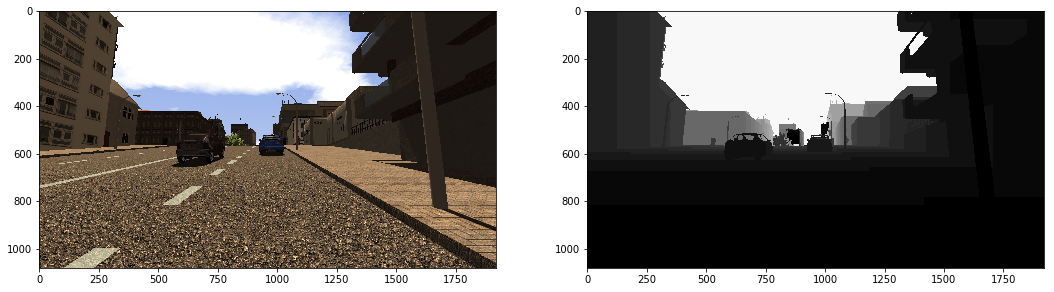

In [23]:
idx = 103
rgb_im   = cv2.imread(rgb_glob[idx])
depth_im = cv2.imread(depth_glob[idx])
print(rgb_im.shape)
print(depth_im.shape)

plt.figure(figsize=(18, 18))
plt.subplot(221)
plt.imshow( rgb_im[:,:,::-1] )
plt.subplot(222)
depth_im[:,:,1] = depth_im[:,:,0]
depth_im[:,:,2] = depth_im[:,:,0]
plt.imshow( depth_im[:,:,:]*8)

# Cityscapes

In [1]:
import tensorflow as tf
from deeplab import common
from deeplab import model
from deeplab.datasets import data_generator
import numpy as np
import matplotlib.pyplot as plt

dataset = data_generator.Dataset(
    dataset_name='cityscapes',
    split_name='train',
    dataset_dir='/datatmp/Experiments/belbarashy/datasets/Cityscapes/tfrecord/',
    batch_size=8,
    crop_size=[513,513],
    min_resize_value=None,
    max_resize_value=None,
    resize_factor=None,
    min_scale_factor=0.5,
    max_scale_factor=2.,
    scale_factor_step_size=0.25,
    model_variant=None,
    num_readers=2,
    is_training=False,
    should_shuffle=True,
    should_repeat=True)

samples = dataset.get_one_shot_iterator().get_next()


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.


In [2]:
num_classes = 19
with tf.Session() as sess:
    x = sess.run(samples)
    print(x['image_name'])
    labels = x['label']
    labels = tf.reshape(labels, shape=[-1])
    one_hot_labels = tf.one_hot(labels, num_classes, on_value=1.0, off_value=0.0)
    print(one_hot_labels.shape)

[b'cologne_000030_000019' b'cologne_000010_000019'
 b'cologne_000035_000019' b'hanover_000000_029455'
 b'hanover_000000_034015' b'hanover_000000_038773'
 b'cologne_000032_000019' b'hanover_000000_040793']
(16777216, 19)


(8, 1024, 2048, 3)
(8, 1024, 2048, 1)
(1024, 2048, 3)
48.334496


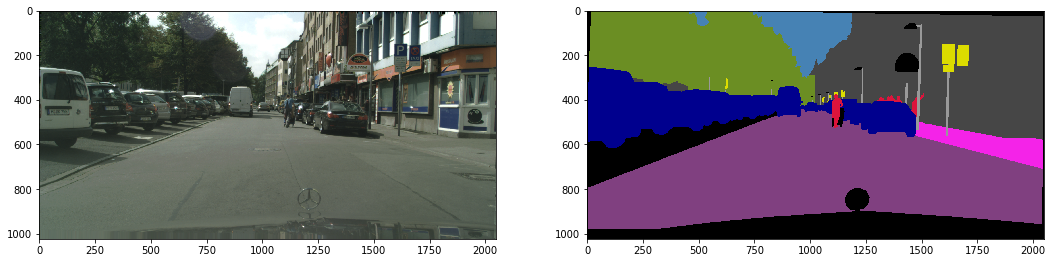

In [4]:
from deeplab.utils import get_dataset_colormap

print(x['image'].shape)
print(x['label'].shape)
img_idx = 7   # < batch size
original_image = np.squeeze(x['image'][img_idx])
label          = np.squeeze(x['label'][img_idx])

colored_label = get_dataset_colormap.label_to_color_image(label, 'cityscapes')
print(colored_label.shape)
print(original_image.std())


    
plt.figure(figsize=(18, 18))
plt.subplot(221)
plt.imshow( original_image/255 )
plt.subplot(222)#
plt.imshow( colored_label)

5000
(1024, 2048)
126
0


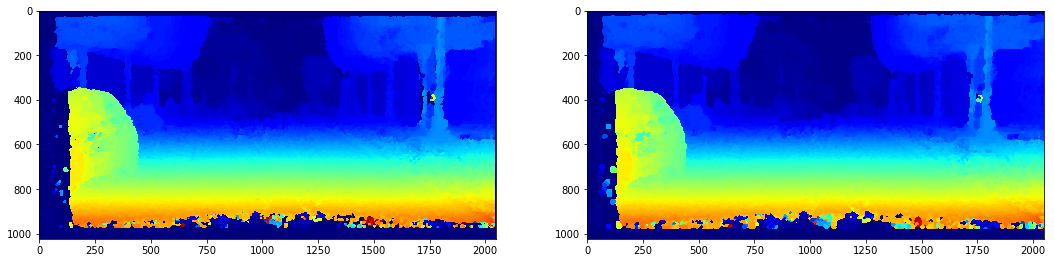

In [85]:
from depth_map_utils import fill_in_fast, fill_in_multiscale

dataset_dir= '/datatmp/Experiments/belbarashy/datasets/Cityscapes/filled_depth'
depth_images= '*/*/*.png'
depth_glob  = glob.glob( os.path.join(dataset_dir, depth_images))
print(len(depth_glob))
depth_map   = cv2.imread(depth_glob[230],cv2.IMREAD_GRAYSCALE)
print( depth_map.shape )
print(depth_map.max())
print(depth_map.min())

plt.figure(figsize=(18, 18))
plt.subplot(221)
plt.imshow( depth_map[:,:] ,cmap='jet' )

filled = fill_in_fast(depth_map,blur_type='bilateral', max_depth=255)
plt.subplot(222)#
plt.imshow( filled[:,:] ,cmap='jet')

In [81]:
""" Depth completion """

"""
dataset_dir= '/datatmp/Experiments/belbarashy/datasets/Cityscapes/filled_depth'
depth_images= '*/*/*.png'
depth_glob  = glob.glob( os.path.join(dataset_dir, depth_images))
print(len(depth_glob))
for i in range(len(depth_glob)):
    print(i, end=', ')
    im_path = depth_glob[i]
    depth_map = cv2.imread(im_path,cv2.IMREAD_GRAYSCALE)
    filled = fill_in_fast(depth_map,blur_type='bilateral', max_depth=255)
    cv2.imwrite(im_path,filled)
"""    

5000


0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 

1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668, 1669, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 1690, 1691, 1692, 1693, 1694, 1695, 1696, 1697, 1698, 1699, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719

2919, 2920, 2921, 2922, 2923, 2924, 2925, 2926, 2927, 2928, 2929, 2930, 2931, 2932, 2933, 2934, 2935, 2936, 2937, 2938, 2939, 2940, 2941, 2942, 2943, 2944, 2945, 2946, 2947, 2948, 2949, 2950, 2951, 2952, 2953, 2954, 2955, 2956, 2957, 2958, 2959, 2960, 2961, 2962, 2963, 2964, 2965, 2966, 2967, 2968, 2969, 2970, 2971, 2972, 2973, 2974, 2975, 2976, 2977, 2978, 2979, 2980, 2981, 2982, 2983, 2984, 2985, 2986, 2987, 2988, 2989, 2990, 2991, 2992, 2993, 2994, 2995, 2996, 2997, 2998, 2999, 3000, 3001, 3002, 3003, 3004, 3005, 3006, 3007, 3008, 3009, 3010, 3011, 3012, 3013, 3014, 3015, 3016, 3017, 3018, 3019, 3020, 3021, 3022, 3023, 3024, 3025, 3026, 3027, 3028, 3029, 3030, 3031, 3032, 3033, 3034, 3035, 3036, 3037, 3038, 3039, 3040, 3041, 3042, 3043, 3044, 3045, 3046, 3047, 3048, 3049, 3050, 3051, 3052, 3053, 3054, 3055, 3056, 3057, 3058, 3059, 3060, 3061, 3062, 3063, 3064, 3065, 3066, 3067, 3068, 3069, 3070, 3071, 3072, 3073, 3074, 3075, 3076, 3077, 3078, 3079, 3080, 3081, 3082, 3083, 3084, 3085

4286, 4287, 4288, 4289, 4290, 4291, 4292, 4293, 4294, 4295, 4296, 4297, 4298, 4299, 4300, 4301, 4302, 4303, 4304, 4305, 4306, 4307, 4308, 4309, 4310, 4311, 4312, 4313, 4314, 4315, 4316, 4317, 4318, 4319, 4320, 4321, 4322, 4323, 4324, 4325, 4326, 4327, 4328, 4329, 4330, 4331, 4332, 4333, 4334, 4335, 4336, 4337, 4338, 4339, 4340, 4341, 4342, 4343, 4344, 4345, 4346, 4347, 4348, 4349, 4350, 4351, 4352, 4353, 4354, 4355, 4356, 4357, 4358, 4359, 4360, 4361, 4362, 4363, 4364, 4365, 4366, 4367, 4368, 4369, 4370, 4371, 4372, 4373, 4374, 4375, 4376, 4377, 4378, 4379, 4380, 4381, 4382, 4383, 4384, 4385, 4386, 4387, 4388, 4389, 4390, 4391, 4392, 4393, 4394, 4395, 4396, 4397, 4398, 4399, 4400, 4401, 4402, 4403, 4404, 4405, 4406, 4407, 4408, 4409, 4410, 4411, 4412, 4413, 4414, 4415, 4416, 4417, 4418, 4419, 4420, 4421, 4422, 4423, 4424, 4425, 4426, 4427, 4428, 4429, 4430, 4431, 4432, 4433, 4434, 4435, 4436, 4437, 4438, 4439, 4440, 4441, 4442, 4443, 4444, 4445, 4446, 4447, 4448, 4449, 4450, 4451, 4452